### Imports

In [5]:
import sys
sys.path.append('../scripts')

import datetime
from data_structure import Event as FireEvent

import earthpy.plot as ep
import rasterio
import rioxarray as rxr

### Setup

In [2]:
# Australia event
start_date = datetime.date(year=2020, month=5, day=25)
end_date = datetime.date(year=2020, month=7, day=15) 
event = FireEvent(start_date, end_date, -36.557307387236094, 149.11827128891002)

# Fetching data

In [3]:
event.get_modis_data()
event.modis_path

['../data/modis/final/MOD14A1.A2020177.h29v12.061.2020340081657.fire.cropped.resized.tif']

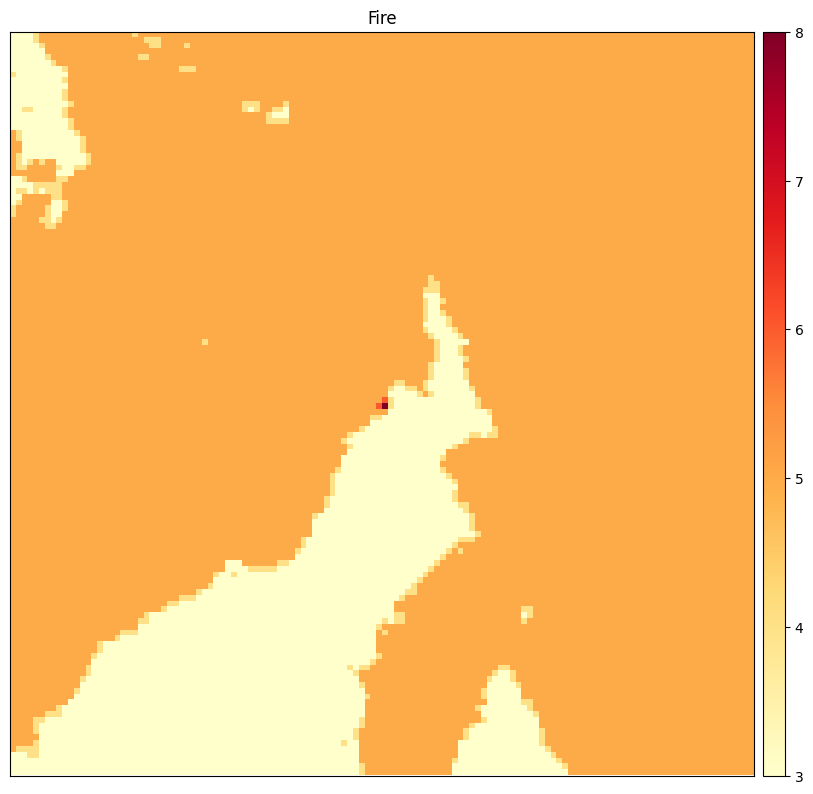

<Axes: title={'center': 'Fire'}>

In [4]:
# Open the first available file
modis = rasterio.open(event.modis_path[0])
ep.plot_bands(modis.read(1), title="Fire", cmap="YlOrRd", figsize=(10, 10))

In [6]:
event.get_weather_data()
event.weather_path

[['../data/modis/final/MOD14A1.A2020177.h29v12.061.2020340081657.fire.cropped.resized.tif.tavg',
  '../data/modis/final/MOD14A1.A2020177.h29v12.061.2020340081657.fire.cropped.resized.tif.prcp',
  '../data/modis/final/MOD14A1.A2020177.h29v12.061.2020340081657.fire.cropped.resized.tif.wspd',
  '../data/modis/final/MOD14A1.A2020177.h29v12.061.2020340081657.fire.cropped.resized.tif.sin_wdir',
  '../data/modis/final/MOD14A1.A2020177.h29v12.061.2020340081657.fire.cropped.resized.tif.cos_wdir']]

In [ ]:
# Open the raster files
tavg_tiff = rxr.open_rasterio(event.weather_path[0])
prcp_tiff = rxr.open_rasterio(event.weather_path[1])
wspd_tiff = rxr.open_rasterio(event.weather_path[2])
cos_wdir_tiff = rxr.open_rasterio(event.weather_path[3])
sin_wdir_tiff = rxr.open_rasterio(event.weather_path[4])



print("Temperature: ", tavg_tiff.shape)
print("Precipitation: ", prcp_tiff.shape)
print("Wind Direction: ", wspd_tiff.shape)
print("Wind Speed: ", cos_wdir_tiff.shape)
print("Wind Speed: ", sin_wdir_tiff.shape)


# Open the raster files
tavg_tiff = rasterio.open(event.weather_path[0)
prcp_tiff = rasterio.open(event.weather_path[0)
wdir_tiff = rasterio.open(event.weather_path[0)
wspd_tiff = rasterio.open(event.weather_path[0)
wspd_tiff = rasterio.open(event.weather_path[0)


# Plot the data
fig, axs = plt.subplots(2, 2, figsize=(20, 20))
axs = axs.ravel()

# Plot the temperature
axs[0].imshow(tavg_tiff.read(1), cmap="coolwarm")
axs[0].set_title("Temperature")
axs[0].axis("off")

# Plot the precipitation
axs[1].imshow(prcp_tiff.read(1))
axs[1].set_title("Precipitation")
axs[1].axis("off")

axs[2].imshow(wdir_tiff.read(1), cmap="hsv")
axs[2].set_title("Wind Direction")
axs[2].axis("off")

axs[3].imshow(wspd_tiff.read(1), cmap="hot")
axs[3].set_title("Wind Speed")
axs[3].axis("off")

plt.show()

In [ ]:
event.get_sentinel_data()
event.sentinel_path

In [ ]:
tensor = event.create_tensor_from_tiffs()
tensor.shape